# The Data Geberating Process & Simulation



   Markov State   Sigma 1   Sigma 2  Return 1  Return 2  Cumulative Return 1  \
0           0.0  0.100000  0.100000  0.000000  0.000000             0.000000   
1           0.0  0.591608  0.529150  0.228469 -0.256381             0.228469   
2           0.0  0.815073  0.805579 -0.919048  0.880511            -0.690579   
3           0.0  0.991590  0.965668 -1.422714  1.937659            -2.113292   
4           0.0  1.105717  1.079954 -0.555031  0.704720            -2.668323   

   Cumulative Return 2  
0             0.000000  
1            -0.256381  
2             0.624130  
3             2.561788  
4             3.266508  


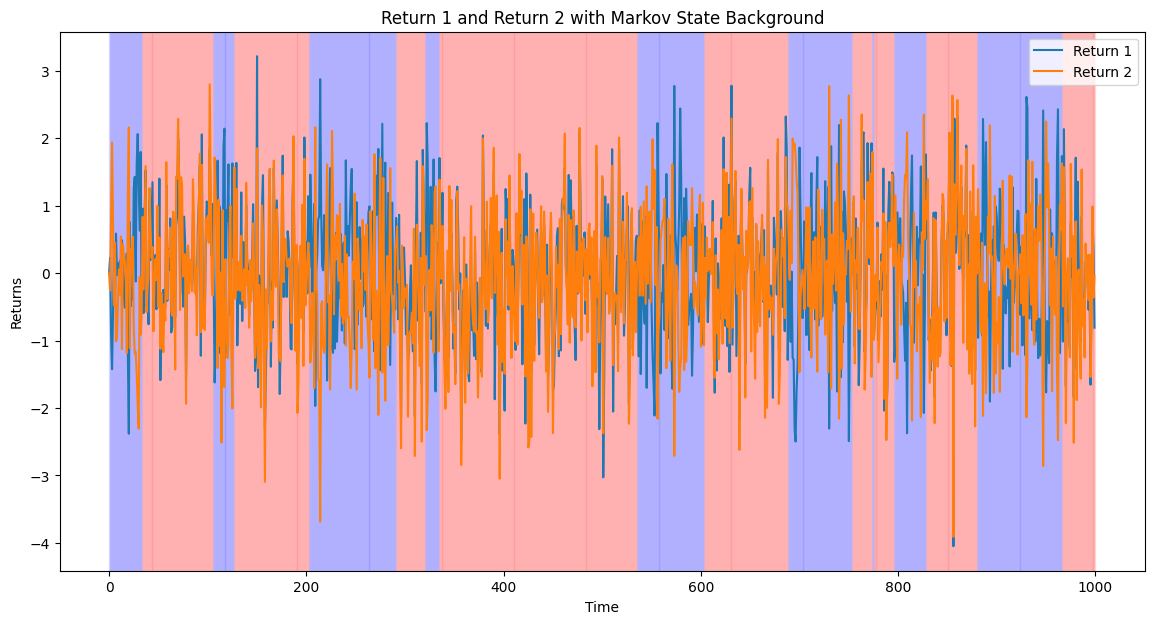

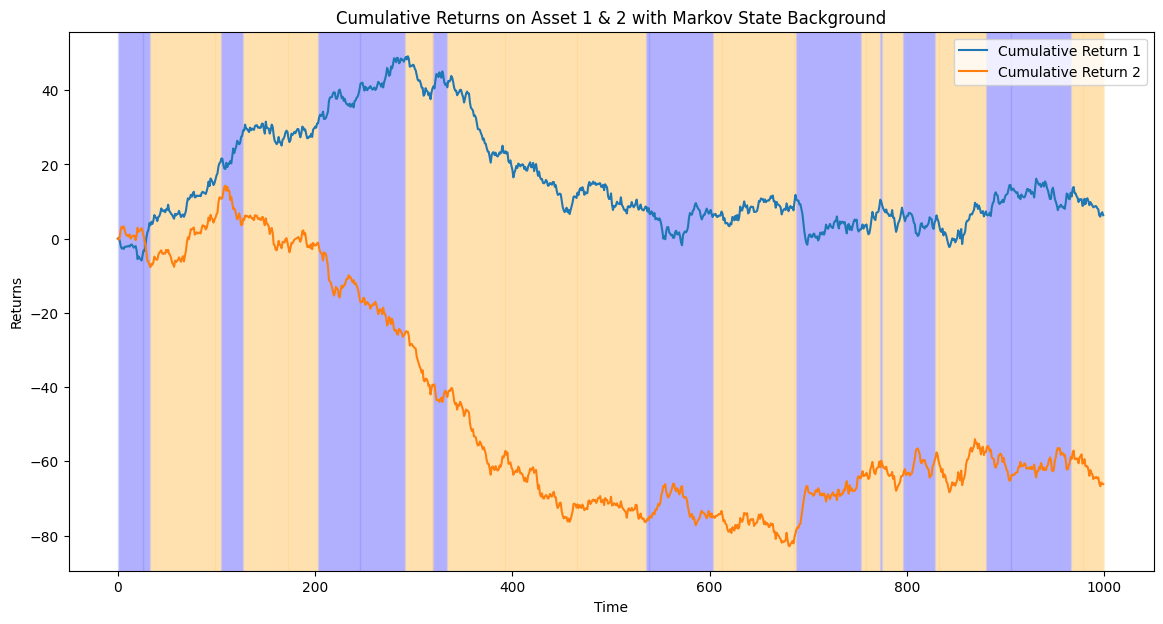

In [7]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Parameters for the simulation.
omega1 = [0.3,0.3]
omega2 = [0.2,0.2]
alpha1 = [0.3,0.3]
alpha2 = [0.1,0.1]
beta1 = [0.5,0.5]
beta2 = [0.8,0.8]
rho = [-0.9, 0.9]


# Precompute Cholesky decompositions for each rho value
C_0 = np.array([[1, rho[0]], [rho[0], 1]])
C_1 = np.array([[1, rho[1]], [rho[1], 1]])
L_0 = np.linalg.cholesky(C_0)
L_1 = np.linalg.cholesky(C_1)

# The transition Matrix
transition_matrix = np.array([[0.99, 0.01],[0.01, 0.99]])

# Simulation settings
num_obs = 1000

# First is state, 2nd & 3rd are sigmas, 4th & 5th are Returns 
markov_state = np.zeros(num_obs)
sigma_1 = np.zeros(num_obs)
sigma_2 = np.zeros(num_obs)

return_1 = np.zeros(num_obs)
return_2 = np.zeros(num_obs)

sigma_1[0] = 0.1 # Initial variance for time series 1
sigma_2[0] = 0.1 # Initial variance for time series 2
return_1[0] = 0.0 # Initial return for time series 1
return_2[0] = 0.0 # Initial return for time series 2


# Generating Data:
for t in range(1, num_obs):
    # Generate Markov State
    current_state = int(markov_state[t-1])
    
    # Use the transition matrix to determine the next state
    markov_state[t] = np.random.choice([0, 1], p=transition_matrix[current_state])

    # Set state to draw parameters:
    state = int(markov_state[t])
    # Generate Sigmas
    sigma_1[t] = np.sqrt(omega1[state] + alpha1[state] * np.abs(return_1[t-1]) + beta1[state] * np.abs(sigma_1[t-1]))
    sigma_2[t] = np.sqrt(omega2[state] + alpha2[state] * np.abs(return_2[t-1]) + beta2[state] * np.abs(sigma_2[t-1]))

                         
    # Generate standard normal random variables
    Z = np.random.normal(size=(2,))
    
    # Transform Z using Cholesky matrix L based on current state
    if state == 0:
        epsilon = L_0.dot(Z)
    else:
        epsilon = L_1.dot(Z)
    
    # Generate Returns with the correlated shocks
    return_1[t] = sigma_1[t] * epsilon[0]
    return_2[t] = sigma_2[t] * epsilon[1]


# To Dataframe

# Step 1: Create DataFrame
df = pd.DataFrame({
    'Markov State': markov_state,
    'Sigma 1': sigma_1,
    'Sigma 2': sigma_2,
    'Return 1': return_1,
    'Return 2': return_2
})

# Step 2: Calculate Cumulative Returns
# The cumulative return is calculated by cumulatively multiplying (1 + return) for each return in the series
df['Cumulative Return 1'] = np.cumsum(return_1)
df['Cumulative Return 2'] = np.cumsum(return_2)

# Show the first few rows of the DataFrame to verify
print(df.head())

# Plot the data
# Set up the plot
plt.figure(figsize=(14, 7))

# Plot 'Return 1' and 'Return 2'
plt.plot(df.index, df['Return 1'], label='Return 1')
plt.plot(df.index, df['Return 2'], label='Return 2')

# Shade background based on Markov State
for t in range(len(df)):
    if df['Markov State'][t] == 1:
        plt.axvspan(t, t+1, color='red', alpha=0.1)
    else:
        plt.axvspan(t, t+1, color='blue', alpha=0.1)

# Customize the plot
plt.title('Return 1 and Return 2 with Markov State Background')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()


# Plot the cumulative data
# Set up the plot
plt.figure(figsize=(14, 7))

# Plot 'Return 1' and 'Return 2'
plt.plot(df.index, df['Cumulative Return 1'], label='Cumulative Return 1')
plt.plot(df.index, df['Cumulative Return 2'], label='Cumulative Return 2')

# Shade background based on Markov State
for t in range(len(df)):
    if df['Markov State'][t] == 1:
        plt.axvspan(t, t+1, color='orange', alpha=0.1)
    else:
        plt.axvspan(t, t+1, color='blue', alpha=0.1)

# Customize the plot
plt.title('Cumulative Returns on Asset 1 & 2 with Markov State Background')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()



# Show plot
plt.show()



In [8]:
save_df = pd.DataFrame()
save_df['Return 1'] = df['Return 1']
save_df['Return 2'] = df['Return 2']
save_df.to_csv('99.csv')